# Find Velocity for Particle in Water

## Import packages

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Extract Data from File
It is stored in a pandas dataframe. The current coordinate system is rotated such that the $y$-direction appears at the top (where one would expect $z$ to be). This is accounted for when loading in the data.

In [108]:
FILENAME = "m1_1.75V.a"

data = {
        "t": [],
        "x": [],
        "y": [],
        "z": [],
        "u(p)": [],
        "0.0": [],
        "0.00": [],
        "fN-used": []
    }

headerLen = 9
with open(FILENAME) as file:
    for i, line in enumerate(file):
        if i >= headerLen:         
            part = line.split()
            data["t"].append(float(part[0]))
            data["y"].append(float(part[1]))
            data["z"].append(float(part[2]))
            data["x"].append(float(part[3]))
            data["u(p)"].append(float(part[4]))
            data["0.0"].append(float(part[5]))
            data["0.00"].append(float(part[6]))
            data["fN-used"].append(float(part[7]))

for d in data:
    data[d] = np.array(data[d])
        
df = pd.DataFrame(data)
df

,t,x,y,z,u(p),0.0,0.00,fN-used
0,10.5,3.1,-58.0,45.7,9.6,0.0,0.0,920.0
1,32.2,3.0,-57.8,45.4,9.0,0.0,0.0,920.0
2,53.8,2.5,-57.6,46.3,9.6,0.0,0.0,920.0
3,74.0,1.8,-58.0,46.2,9.3,0.0,0.0,920.0
4,95.7,0.9,-57.9,45.9,9.2,0.0,0.0,920.0
...,...,...,...,...,...,...,...,...
25149,599832.1,54.0,-16.8,46.7,9.7,0.0,0.0,920.0
25150,599861.9,53.4,-15.8,46.7,10.0,0.0,0.0,920.0
25151,599887.3,53.7,-18.3,45.7,9.4,0.0,0.0,920.0
25152,599912.8,53.6,-17.2,46.4,9.9,0.0,0.0,920.0


## Plotting Trajectory
The data is stored in Cartesian coordinates $(x,y,z)$.

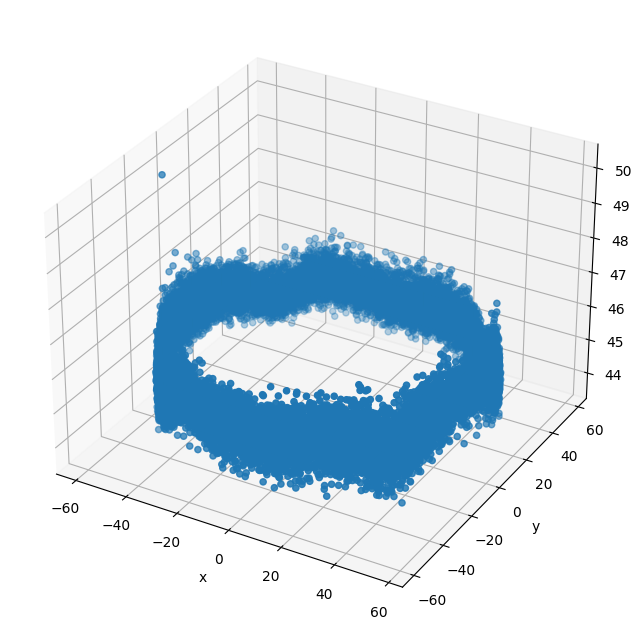

In [109]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df["x"],df["y"],df["z"])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## Calculating Velocities
A discretised form of differentiation is applied to the collected position data in order to generate velocity information. The last 6 postion points are taken into account.

In [110]:
vel = {
    "Vx": [],
    "Vy": [],
    "Vz": []
}

In [111]:
# note time is the 0th coordinate
# x,y,z are 1,2,3
for coord in (1,2,3):
   for i in range(5, len(df)-5):
      T1 = (df.iloc[i+5,coord] - df.iloc[i,coord])/(df.iloc[i+5,0]-df.iloc[i,0])
      T2 = (df.iloc[i+4,coord] - df.iloc[i-1,coord])/(df.iloc[i+4,0]-df.iloc[i-1,0])
      T3 = (df.iloc[i+3,coord] - df.iloc[i-2,coord])/(df.iloc[i+3,0]-df.iloc[i-2,0])
      T4 = (df.iloc[i+2,coord] - df.iloc[i-3,coord])/(df.iloc[i+2,0]-df.iloc[i-3,0])
      T5 = (df.iloc[i+1,coord] - df.iloc[i-4,coord])/(df.iloc[i+1,0]-df.iloc[i-4,0])
      T6 = (df.iloc[i,coord] - df.iloc[i-5,coord])/(df.iloc[i,0]-df.iloc[i-5,0])
      v = 0.1*T1+0.15*T2+0.25*T3+0.25*T4+0.15*T5+0.1*T6
      # add v to vel dataframe
      if (coord == 1):
         vel["Vx"].append(float(v))
      elif (coord == 2):
         vel["Vy"].append(float(v))
      else:  
         vel["Vz"].append(float(v)) 

for d in vel:
    vel[d] = np.array(vel[d])
        
vel_df = pd.DataFrame(vel)
vel_df

,Vx,Vy,Vz
0,-0.025549,0.000230,0.000923
1,-0.024316,0.000361,0.000327
2,-0.023184,0.001027,-0.000197
3,-0.022807,0.000740,-0.000331
4,-0.023240,0.000600,-0.000380
...,...,...,...
25139,-0.003866,-0.025483,0.000044
25140,-0.004964,-0.025636,0.000511
25141,-0.005676,-0.026711,0.000413
25142,-0.005968,-0.026484,0.000422


## Plotting the Vector Field
### Plotting in 3D
This shows the entire velocity vector field, but the directions of the vectors are quite hard to see. The following parameters can be adjusted:
- `n` which specifies the last velocity vector to be shown.
- `k` which determines the distance between vectors.

Thus the ratio `n/k` tells us how many vectors are to to be shown.


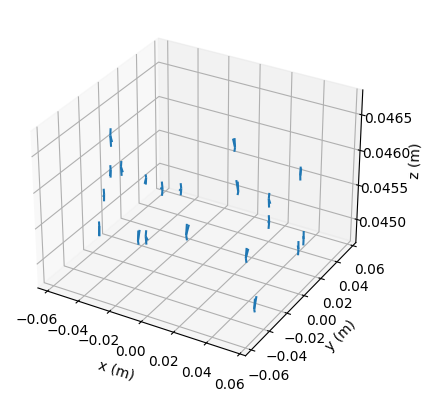

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

mm_to_metres = 0.001
n= 10000
k = 500

ax.quiver(df.iloc[5:n+5:k,1]*mm_to_metres, df.iloc[5:n+5:k,2]*mm_to_metres, df.iloc[5:n+5:k,3]*mm_to_metres, vel_df.iloc[:n:k,0]*mm_to_metres, vel_df.iloc[:n:k,1]*mm_to_metres, vel_df.iloc[:n:k,2]*mm_to_metres, length = 50, normalize = False)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
plt.show()

### Plotting in 2D
This shows a top-down view ($x-y$ plane) of the velocity vector field.

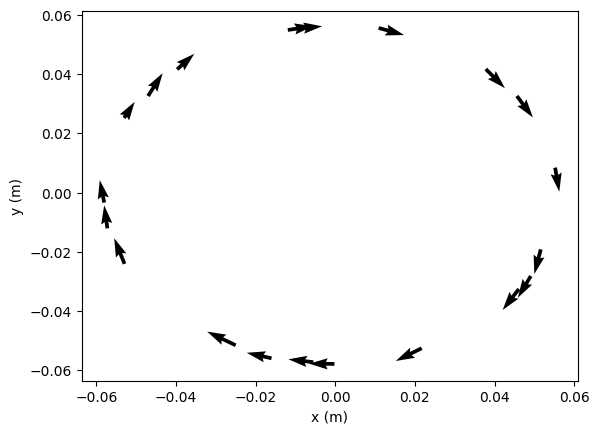

In [113]:
fig, ax = plt.subplots()
ax.quiver(df.iloc[5:n+5:k,1]*mm_to_metres, df.iloc[5:n+5:k,2]*mm_to_metres, vel_df.iloc[:n:k,0]*mm_to_metres, vel_df.iloc[:n:k,1]*mm_to_metres , scale =0.0005)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

plt.show()

This shows a side-on view ($x-z$ plane) of the velocity vector field. The arrows facing the "wrong" direction are on the other side of the cylinder.

Text(0, 0.5, 'z (m)')

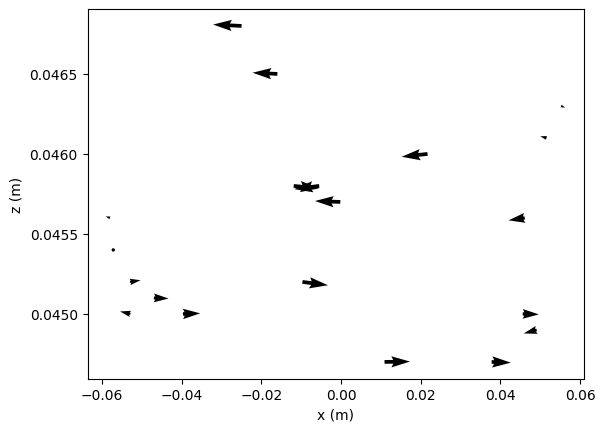

In [114]:
fig, ax = plt.subplots()
ax.quiver(df.iloc[5:n+5:k,1]*mm_to_metres, df.iloc[5:n+5:k,3]*mm_to_metres, vel_df.iloc[:n:k,0]*mm_to_metres, vel_df.iloc[:n:k,2]*mm_to_metres, scale =0.0005)
ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')